# 📌 <span style="color:orange;"> Objectif du Projet  
Développer un modèle de **machine learning** pour identifier les **clients à risque de désabonnement** en fonction de leurs caractéristiques **démographiques, financières et comportementales**.  

## 📂 Source des Données  
Les données proviennent de Kaggle : [[Lien vers le dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)]  

---

## 📊 Explication des Variables  

### 🔹 Informations Générales  
- **Gender** : Genre du client (*Male* / *Female*)  
- **SeniorCitizen** : Indique si le client est une personne âgée (*Oui* / *Non*)  
- **Partner** : Si le client a un(e) partenaire (*Oui* / *Non*)  
- **Dependents** : Si le client a des personnes à charge (*Oui* / *Non*)  

### 🔹 Détails sur le Service  
- **Tenure** : Nombre de mois pendant lesquels le client est resté avec l'entreprise  
- **PhoneService** : Dispose-t-il d'un service téléphonique ? (*Oui* / *Non*)  
- **MultipleLines** : A-t-il plusieurs lignes ? (*Oui* / *Non* / *Pas de service téléphonique*)  
- **InternetService** : Type de connexion Internet (*DSL* / *Fibre optique* / *Non*)  

### 🔹 Sécurité et Assistance  
- **OnlineSecurity** : Sécurité en ligne activée ? (*Oui* / *Non* / *Pas de service Internet*)  
- **OnlineBackup** : Sauvegarde en ligne activée ? (*Oui* / *Non* / *Pas de service Internet*)  
- **DeviceProtection** : Protection des appareils ? (*Oui* / *Non* / *Pas de service Internet*)  
- **TechSupport** : Support technique disponible ? (*Oui* / *Non* / *Pas de service Internet*)  

### 🔹 Services de Streaming  
- **StreamingTV** : Dispose-t-il d'un service de télévision en streaming ? (*Oui* / *Non* / *Pas de service Internet*)  
- **StreamingMovies** : Dispose-t-il d'un service de streaming de films ? (*Oui* / *Non* / *Pas de service Internet*)  

### 🔹 Informations Contractuelles et Facturation  
- **Contract** : Type de contrat (*Mensuel* / *1 an* / *2 ans*)  
- **PaperlessBilling** : Facturation électronique activée ? (*Oui* / *Non*)  
- **PaymentMethod** : Mode de paiement (*Chèque électronique* / *Chèque postal* / *Virement bancaire (automatique)* / *Carte de crédit*)  
- **MonthlyCharges** : Montant facturé mensuellement  
- **TotalCharges** : Montant total facturé  

### 🔹 Résiliation du Service  
- **Churn** : Le client a-t-il quitté l’entreprise ? (*Oui* / *Non*)  

---

## ⚙️ Méthodologie  

### 1️⃣ Analyse Exploratoire  

#### 📌 **Analyse de la Structure des Données**  
- **Variable cible** : `Churn` (*Yes* / *No*)  
- **Dimensions du dataset** : `7 032 lignes × 21 colonnes`  
- **Types des variables** :  
  - **Variables qualitatives** : `15`  
  - **Variables quantitatives** : `5`  
- **Valeurs manquantes** : Aucune valeur manquante détectée  

#### 📌 **Analyse de la Variable Cible**  
- **Classe No** : `73%`  
- **Classe Yes** : `26%`  
- **Déséquilibre de classes** identifié  

#### 📌 **Analyse des Variables Numériques**  
- **TotalCharges** : Distribution asymétrique → **Standardisation recommandée**  
- **MonthlyCharges** : Normalisation **MinMax Scaling** recommandée  

#### 📌 **Relations entre Variables et Churn**  
-  **Hypothèse 1** : Le montant des charges mensuelles pourrait influencer la résiliation du contrant ?
-  **Hypothèse 2** : La durée d'abonnement pourrait jouer un rôle dans le churn  ?

---

### 2️⃣ Préprocessing des Données  
- **Encodage** des variables catégoriques  
- **Normalisation** des variables numériques  
- **Sélection des features pertinentes**  

---

### 3️⃣ Modélisation et Évaluation  

#### 📌 **Modèles Testés**  
-  **Random Forest**  
-  **SVM**  
-  **Régression Logistique**  
-  **KNN**  

#### 📌 **Choix de la Métrologie d’Évaluation**  
**✅** **Recall (Sensibilité)** :  
   - Objectif : **Minimiser les faux négatifs** → Détecter **autant de churns que possible**  
   - **Pourquoi ?** Si un client à risque est mal classé comme "non churn", l’entreprise **perd une opportunité d’intervention**  

✅ **Courbe Précision / Recall** :  
   - Ajuster le seuil de décision pour trouver le **meilleur compromis** entre **précision** et **sensibilité**  

---

## 🎯 Conclusion  
L’objectif est d’identifier **au mieux** les clients à risque afin de proposer des actions préventives et améliorer la rétention.   


In [789]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,learning_curve
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression, chi2 , f_classif, VarianceThreshold
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


#### Importation des données 

In [975]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

Analyse de la forme des données 

In [976]:
df = data.copy()

In [977]:
df.shape

(7043, 21)

<Axes: ylabel='count'>

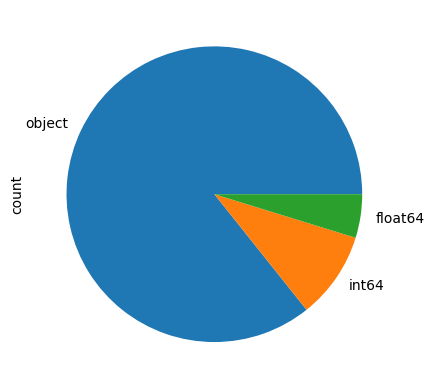

In [978]:
df.dtypes.value_counts().plot.pie()

#### Nettoyages de la data

In [979]:
df.drop(columns=["customerID"], inplace=True) # supression de la variable ID

In [980]:
print(pd.api.types.is_numeric_dtype(df['TotalCharges'])) # la variable totalcharge n'est pas numerique
# data["TotalCharges"].unique() : '29.85', '1889.5', '108.15', ..., '346.45'

False


Convertir la colonne TotalCharges en numerique

In [981]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

Suppresion des valeurs manquantes 

In [982]:
df.isna().sum()  # la variable total charge contient 11 valeurs manquantes

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [983]:
df.dropna(axis=0, inplace=True) # suppresion des valeurs manquantes

**Histogramme des variables continues**

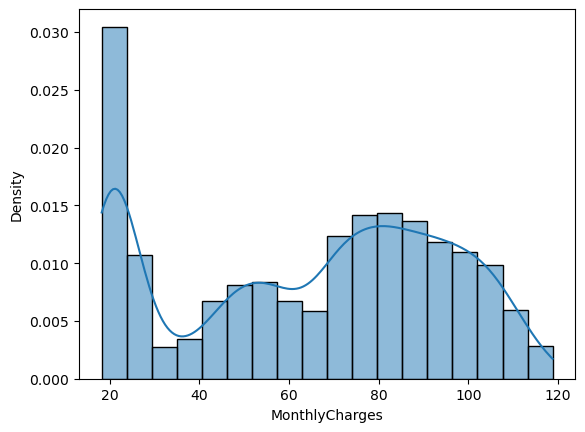

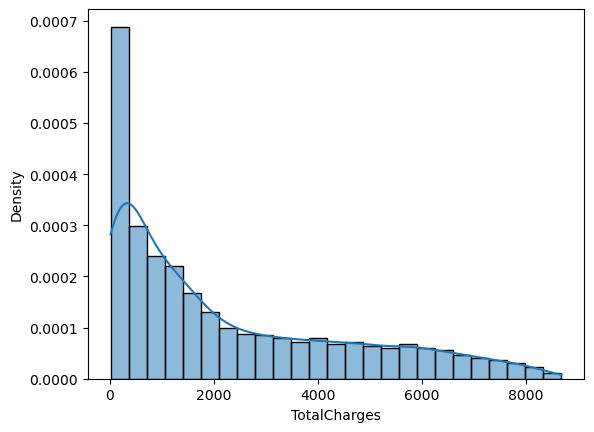

In [986]:
for col in df.select_dtypes('float'):    # mettre ce graphique en subplot
    plt.figure()
    sns.histplot(df[col], kde=True, stat="density")

<Axes: xlabel='tenure', ylabel='Count'>

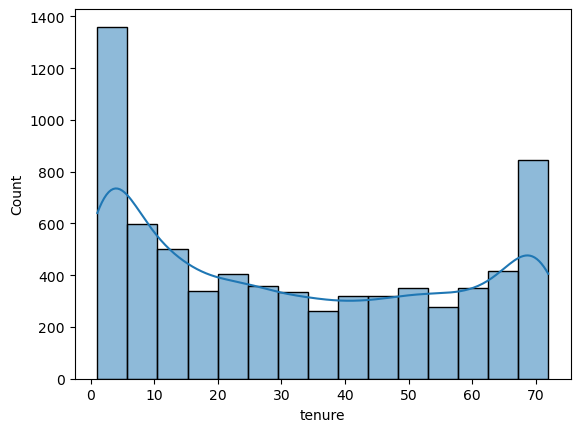

In [1032]:
sns.histplot(df["tenure"],kde=True)

Variable Qualitative 

In [992]:
for col in df.select_dtypes('object'):
    print(f"{col :-<30} {df[col].unique()}")

gender------------------------ ['Female' 'Male']
Partner----------------------- ['Yes' 'No']
Dependents-------------------- ['No' 'Yes']
PhoneService------------------ ['No' 'Yes']
MultipleLines----------------- ['No phone service' 'No' 'Yes']
InternetService--------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------- ['No' 'Yes' 'No internet service']
OnlineBackup------------------ ['Yes' 'No' 'No internet service']
DeviceProtection-------------- ['No' 'Yes' 'No internet service']
TechSupport------------------- ['No' 'Yes' 'No internet service']
StreamingTV------------------- ['No' 'Yes' 'No internet service']
StreamingMovies--------------- ['No' 'Yes' 'No internet service']
Contract---------------------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling-------------- ['Yes' 'No']
PaymentMethod----------------- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn------------------------- ['No' 'Yes']


Bar plot des variable qualitatives 

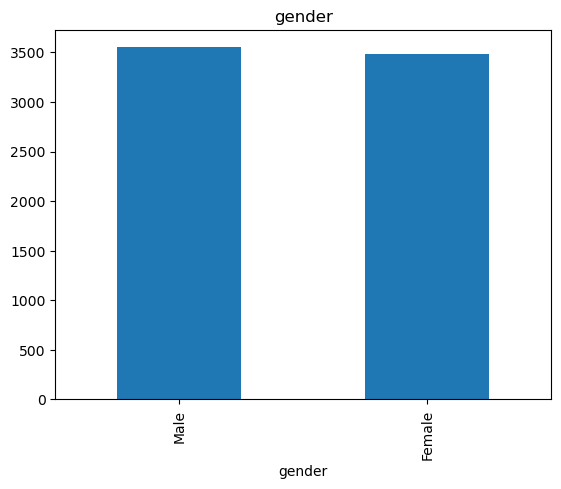

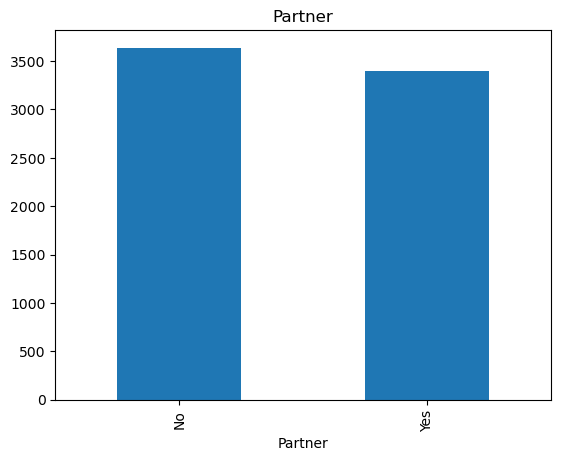

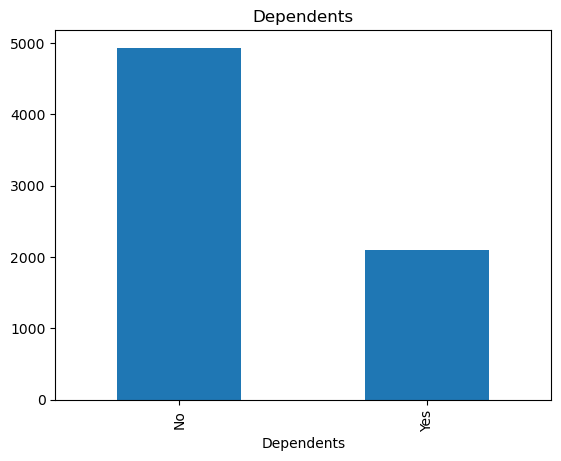

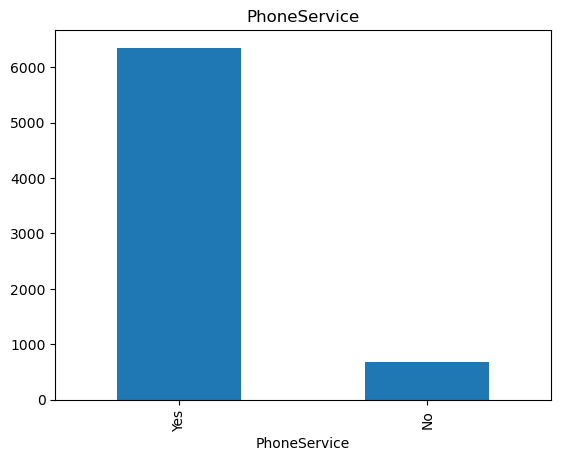

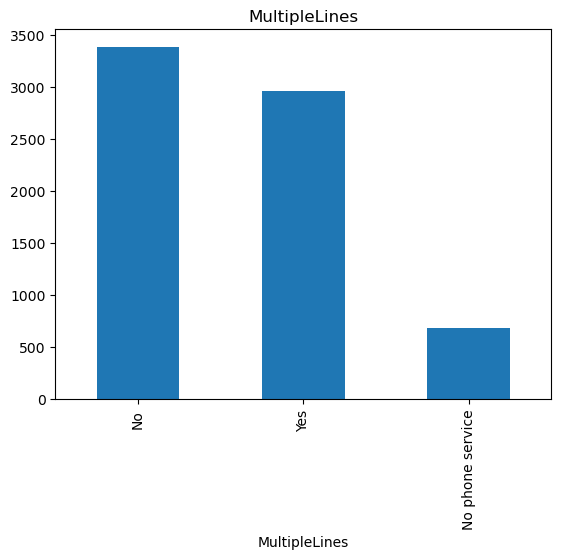

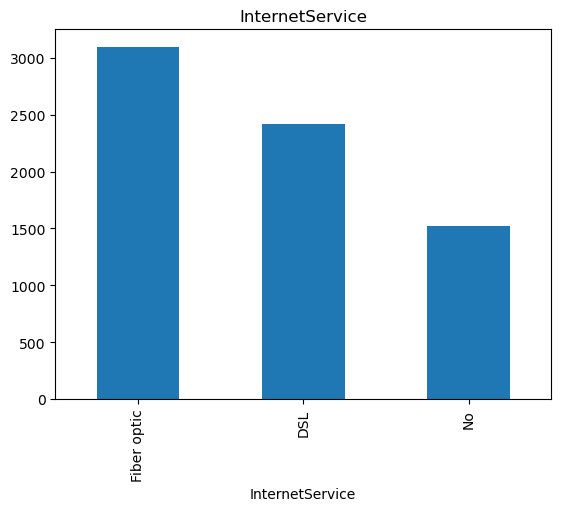

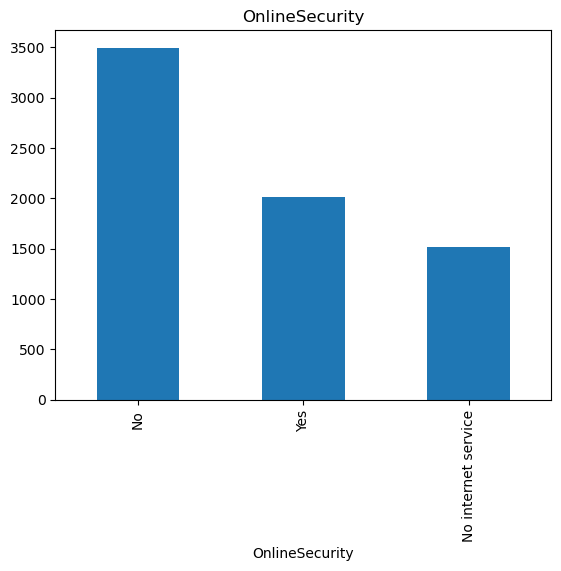

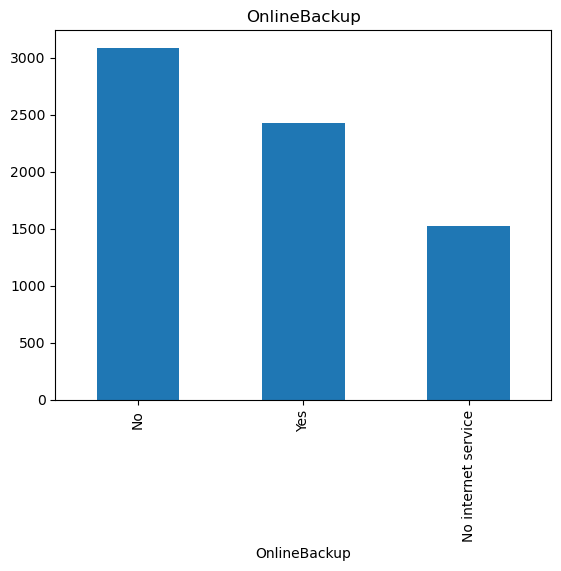

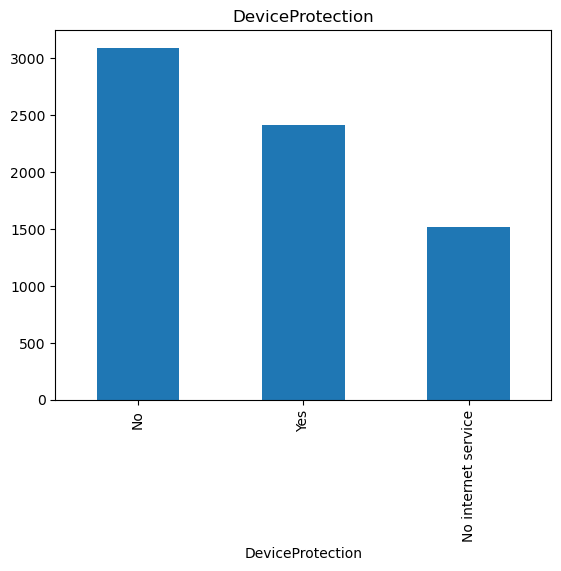

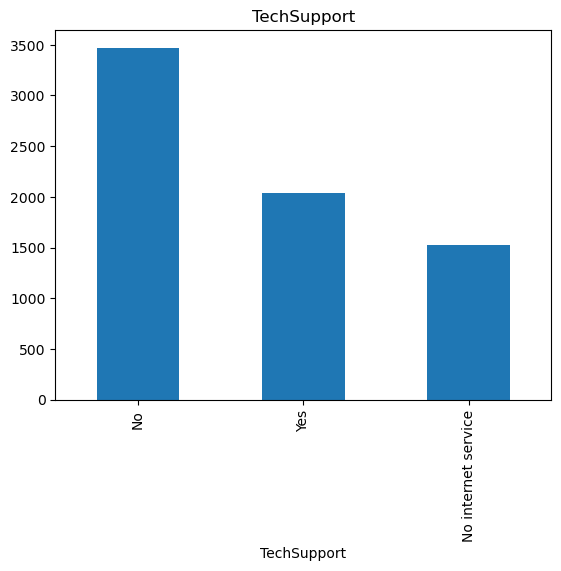

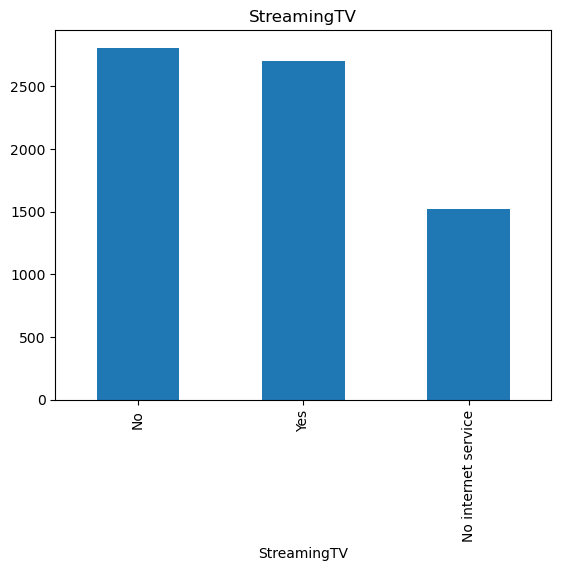

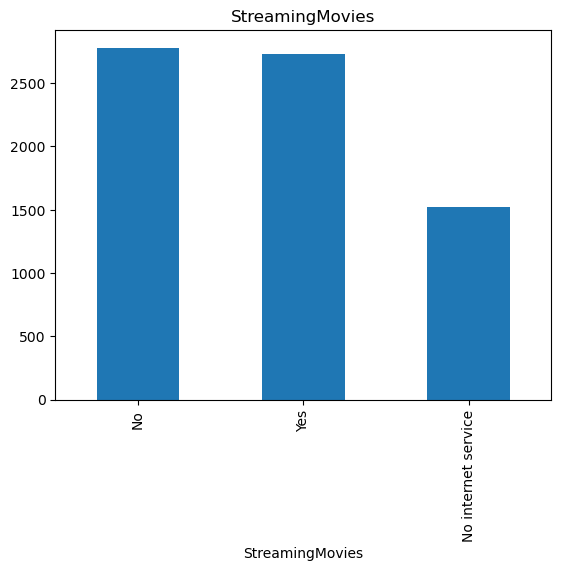

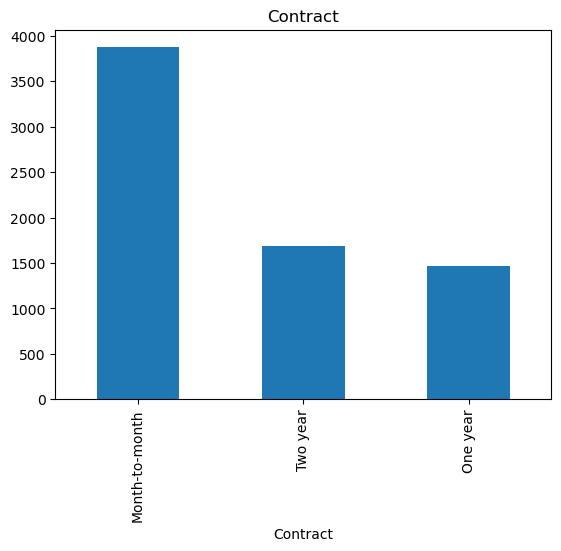

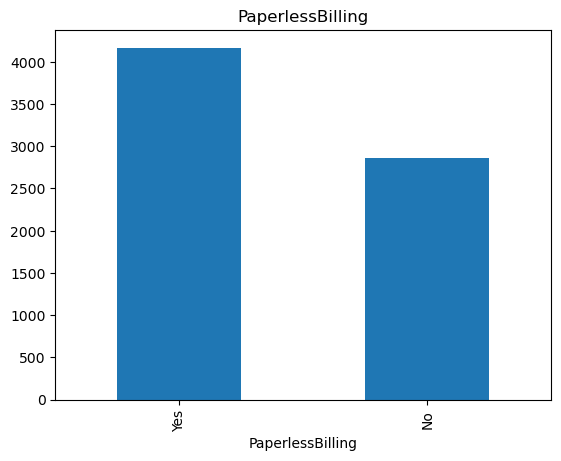

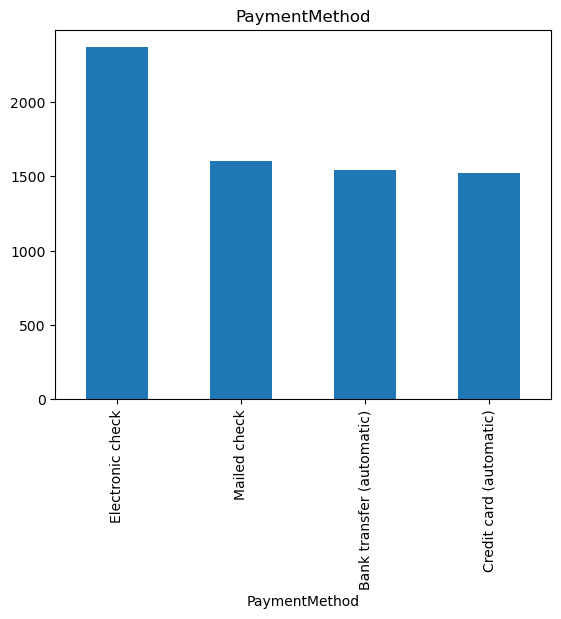

In [1028]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot(kind='bar',title=col)   # mettre tout ça en subplot 

Relation target / Variables Continue

In [998]:
df_churn = df[df["Churn"]=="Yes"]
df_no_churn = df[df["Churn"]=="No"]

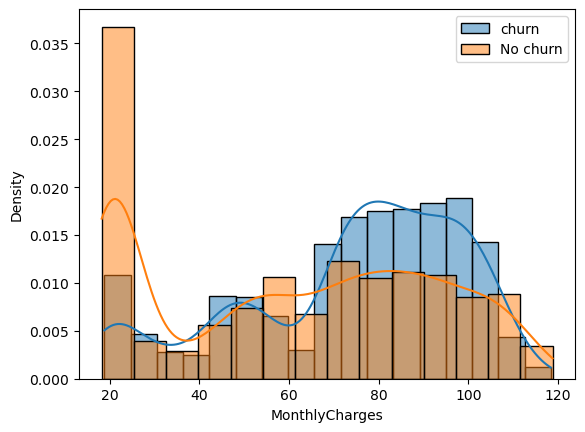

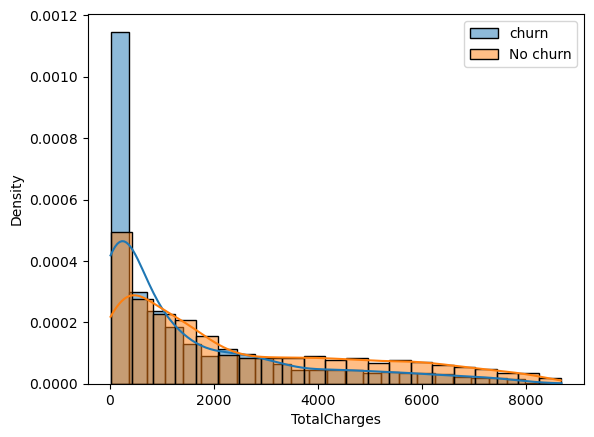

In [1001]:
for col in df.select_dtypes('float'):    # mettre ce graphique en subplot
    plt.figure()
    sns.histplot(df_churn[col], kde=True, stat="density", label="churn")
    sns.histplot(df_no_churn[col], kde=True, stat="density", label="No churn")
    plt.legend()

Relation entre Target et le nombre de mois resté dans l'entreprise

<Axes: xlabel='tenure', ylabel='count'>

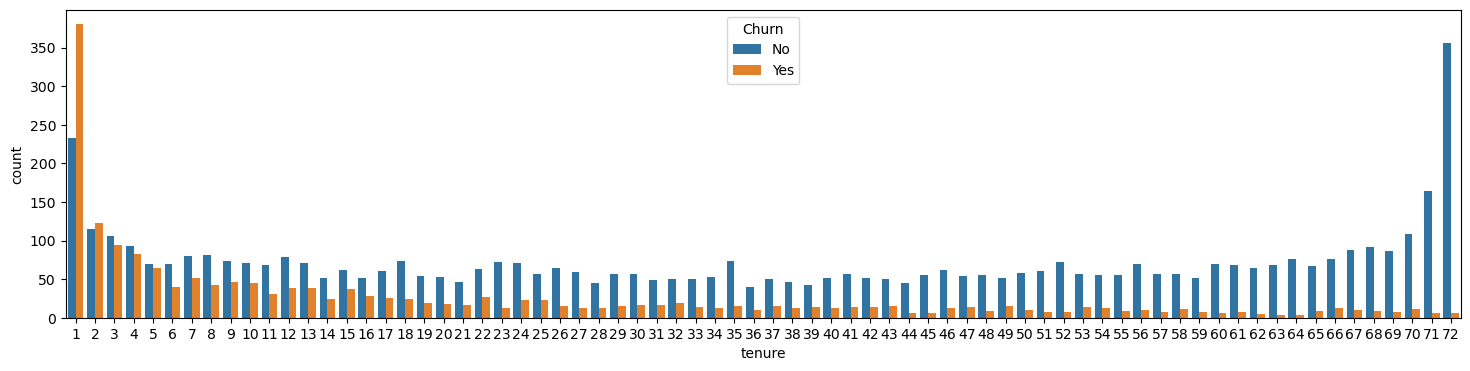

In [1007]:
plt.figure(figsize=(18,4))
sns.countplot(data=df, x="tenure", hue="Churn")

Relation entre Target et variable categorielle

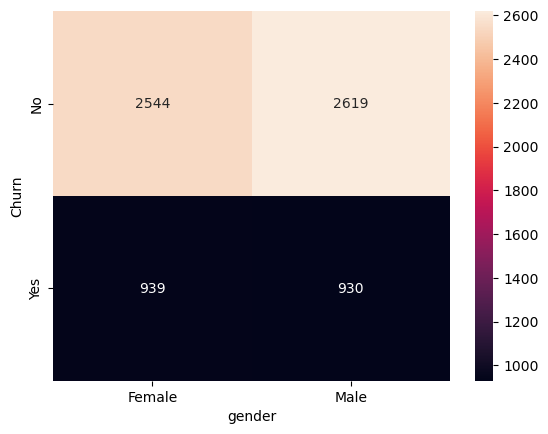

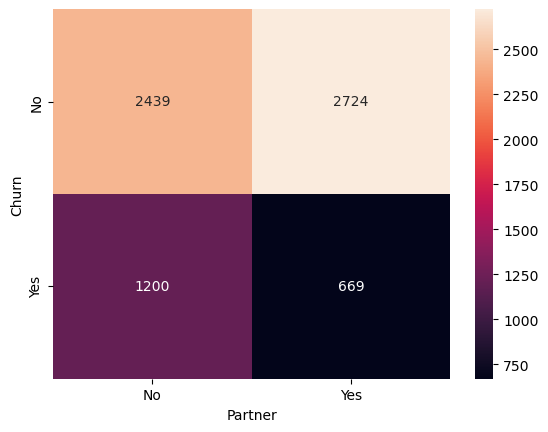

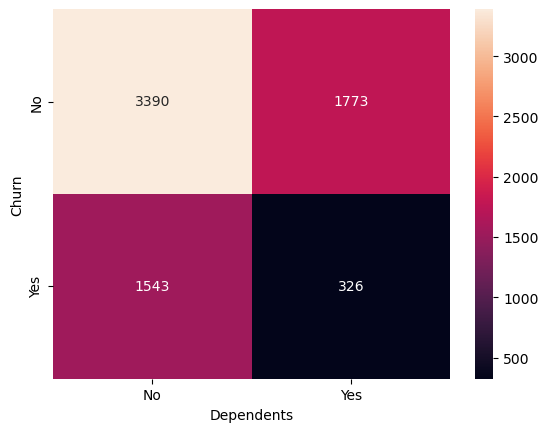

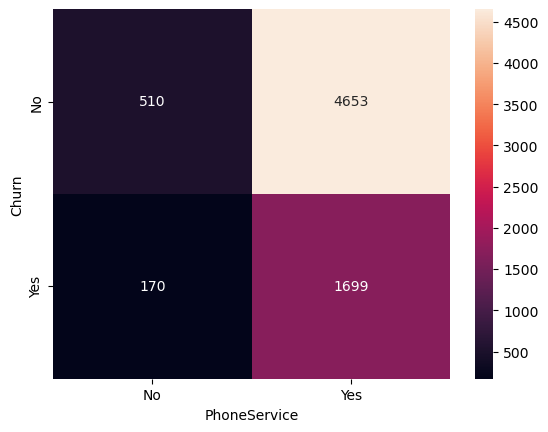

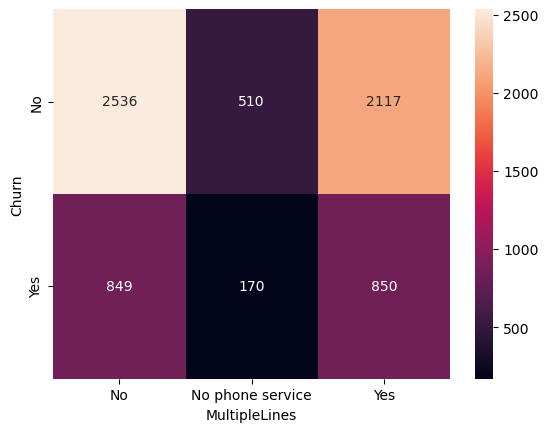

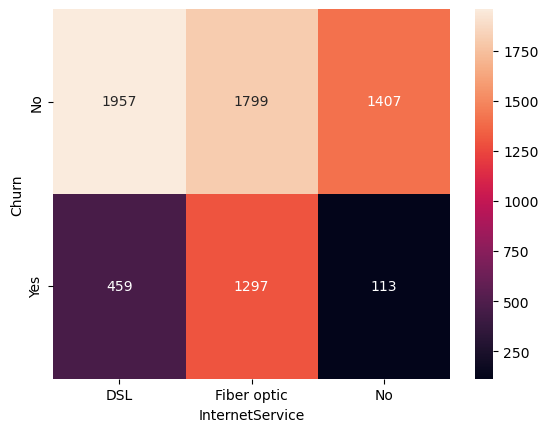

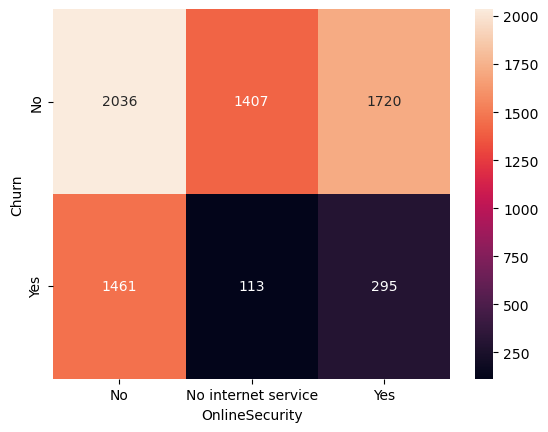

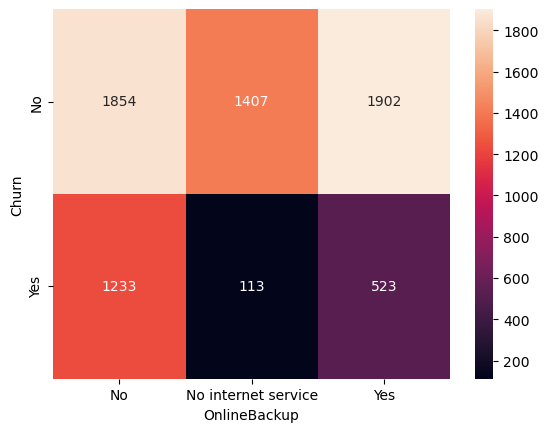

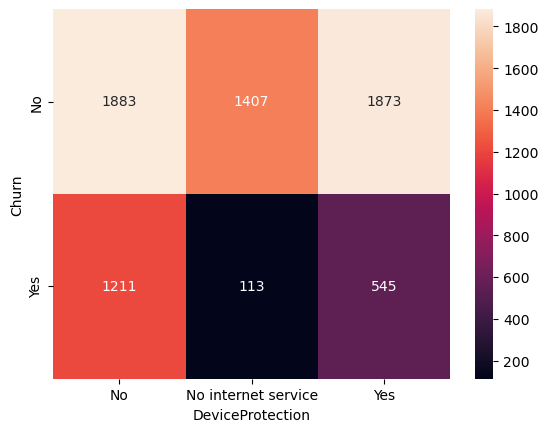

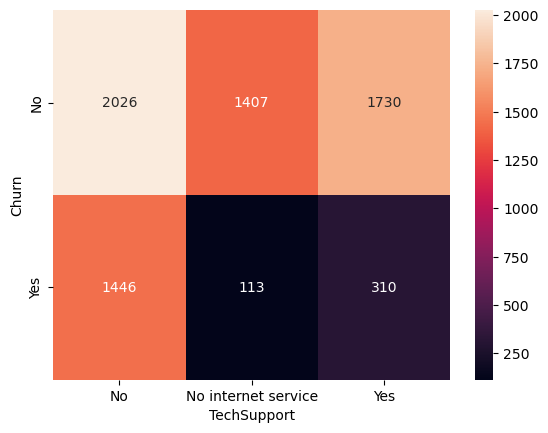

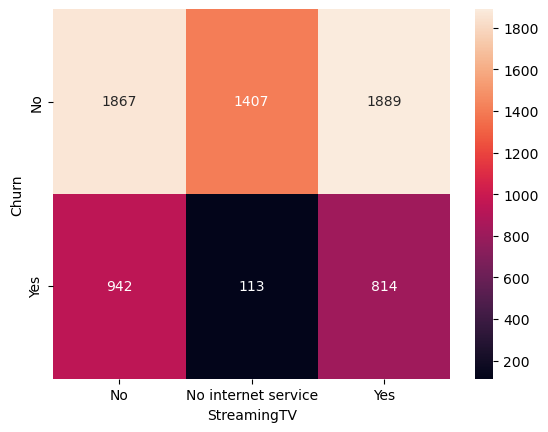

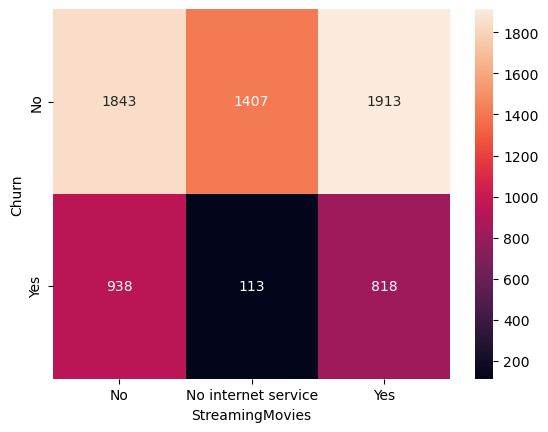

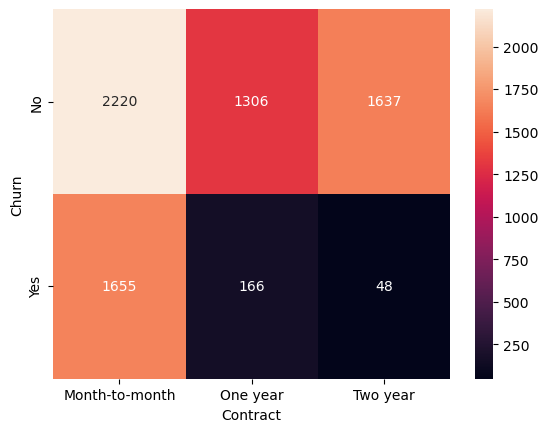

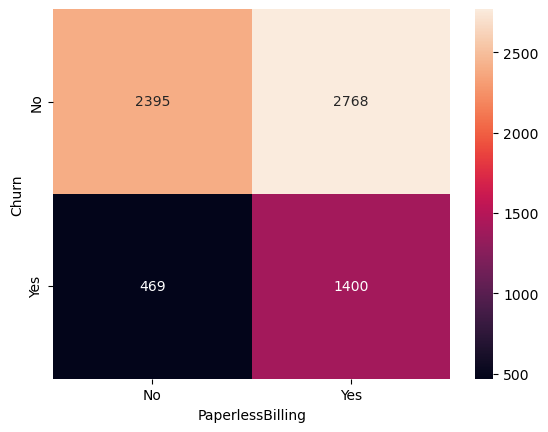

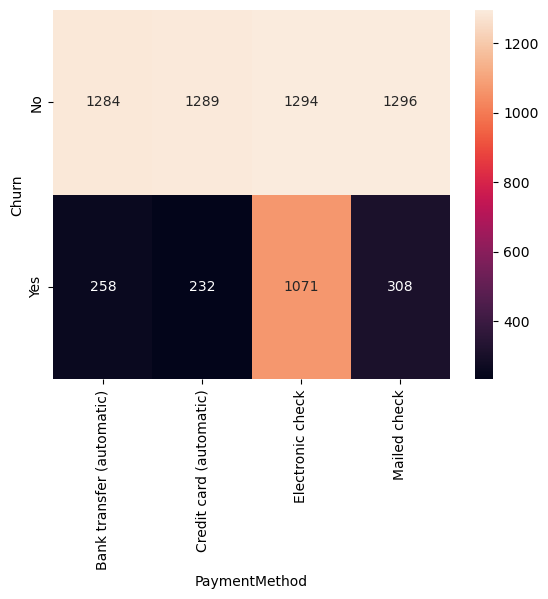

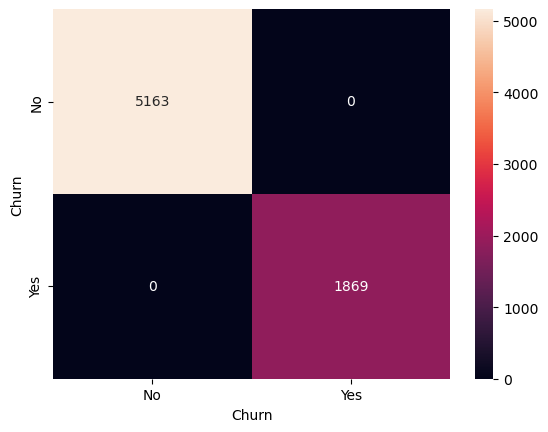

In [1012]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df["Churn"], df[col]), annot=True,fmt='d') # fmt='d' : affiche les valeurs en format entier

### Test d'hypothses 

In [1014]:
from scipy.stats import ttest_ind

Test de student 
  - j'ai plus de 30 observation dans les deux classe 
  - Le montant des charges mensuelles pour les personnes qui churnent et les personnes qui ne churnent pas sont independant

**Hypothèse 1** : Le montant des charges mensuelles pourrait influencer la résiliation    

Hypothèses :   

- H₀ (Hypothèse nulle) : Il n'y a pas de différence significative entre les montants moyens des charges mensuelles des clients qui churnent et ceux qui ne churnent pas.   
- H₁ (Hypothèse alternative) : Il existe une différence significative entre ces montants.

In [1037]:
print("H0:\" Il n'y a pas de différence significative entre les montants moyens des charges mensuelles des clients qui churnent et ceux qui ne churnent pas.\"")
print()
alpha = 0.02
p_value = ttest_ind(df_churn["MonthlyCharges"], df_no_churn["MonthlyCharges"]).pvalue

if p_value < alpha :
    print("Nous avons suffisamment d'evidences pour rejeter H0")
else : 
    print("Nous n'avons pas suffisamment d'evidence pour rejeter H0") 

H0:"Les personnes qui churnent et les personnes qui ne churnent paient le moyenne le meme  montant des charges mensuelles"

Nous avons suffisamment d'evidences pour rejeter H0


⏩ Conclusion  Interprétation : Les personnes qui churnent ne paient pas en moyenne le même montant que celles qui ne churnent pas.

**Hypothèse 2** : La durée d'abonnement pourrait jouer un rôle dans le churn  
- Hypothèse nulle (H₀) : "Il n'existe pas de différence significative entre la durée d'abonnement des clients qui résilient leur contrat et ceux qui ne le résilient pas."
- Hypothèse alternative (H₁) : "La durée d'abonnement influence la résiliation du contrat."

In [1039]:
print("H0:\"Il n'existe pas de différence significative entre la durée d'abonnement des clients qui résilient leur contrat et ceux qui ne le résilient pas.\"")
print()
alpha = 0.02
p_value = ttest_ind(df_churn["tenure"], df_no_churn["tenure"]).pvalue

if p_value < alpha :
    print("Nous avons suffisamment d'evidences pour rejeter H0")
else : 
    print("Nous n'avons pas suffisamment d'evidence pour rejeter H0") 

H0:"Il n'existe pas de différence significative entre la durée d'abonnement des clients qui résilient leur contrat et ceux qui ne le résilient pas."

Nous avons suffisamment d'evidences pour rejeter H0


⏩  Conclusion :   
Il existe bien une différence significative entre la durée d'abonnement des clients qui résilient leur contrat et ceux qui ne le résilient pas.
Ainsi La durée d'abonnement pourrait jouer un rôle dans le churn

### Preprocessing 
1. Types de Variables 

 
**🔹**Variables ordinales (ordre hiérarchique)  
- InternetService et Contract

  
**🔹**Variables catégorielles (nominales)  
- Dependents, PhoneService, MultipleLines, OnlineSecurity
- OnlineBackup, DeviceProtection, TechSupport, StreamingTV
- StreamingMovies, PaperlessBilling, PaymentMethod, SeniorCitizen(0,1)


**🔹** Variables Continues   
   * MonthlyCharges et TotalCharges

**🔹**  Variables discrete : 
- tenure
   


2. Encodage des variables et Normalisation 

In [1027]:
# Onehot encoder
categorial_col = ["Dependents","gender","PhoneService", "MultipleLines","Partner","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "PaymentMethod"]
categorial_col_ordinal = ["InternetService", "Contract"]

# Ordinale encoder 
InternetService_order = ['No','DSL','Fiber optic']  # ordre
contract_order = ['Month-to-month', 'One year', 'Two year' ]

# colonne standard scaler = "TotalCharges"
col_standard = ["TotalCharges"]

# colonne min_max_scaler = "tenure" , ""MonthlyCharges"
col_min_max = ["tenure" , "MonthlyCharges"]
set_config(transform_output='pandas')

3. Construction des Pipelines

In [926]:
kbest_selection = SelectKBest(score_func=f_classif, k=10)
columns_transformer_encoder = ColumnTransformer(
    transformers=[
        ("Encoder_one_hot",OneHotEncoder(sparse_output=False, drop='first'),categorial_col),
        ("Encoder_ordinale", OrdinalEncoder(categories=[InternetService_order,contract_order]),categorial_col_ordinal)
    ],
    remainder="passthrough",
    verbose_feature_names_out = False
)

preprocessor_normaliser = ColumnTransformer(
    transformers=[
        ("col_standard_scaler", StandardScaler(), col_standard),
        ("col_min_max",MinMaxScaler(),col_min_max)
    ],
    remainder="passthrough",
    verbose_feature_names_out = False
)

preprocessor = Pipeline([
    ("encoder", columns_transformer_encoder),
    ("normaliser", preprocessor_normaliser)
])

#### Partionnement des données 

In [1029]:
# pd.set_option('future.no_silent_downcasting', True)
df["Churn"] = df["Churn"].replace({"No": 0, "Yes": 1}).astype(int)
X,y = df.drop(columns="Churn", axis=1), df["Churn"]

In [1031]:
y.value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

**Les classes sont déséquilibrées, ce qui nécessite des techniques comme SMOTE ou un ajustement des poids**

**Alternative sans SMOTE**

In [874]:
# premiere alternative sans SMOTE , les resultats sont moins bons que avec smote 
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, shuffle=True )


**Alternative avec Smote**

In [928]:
# # Donnée desequilibré , j'ai utilisé la methode SMOTE et cela fonctionne trés bien et donne des bonnes resultats
# 2. deuxieme alternative 
# smote = SMOTE(random_state=0)
X = preprocessor.fit_transform(X,y)
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_oversample,y_oversample, test_size=0.2, random_state=0, shuffle=True )


In [930]:
print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(8260, 28)
X_test.shape=(2066, 28)
y_train.shape=(8260,)
y_test.shape=(2066,)


#### Procedure d'evaluation 

In [931]:
preprocessor_finale = make_pipeline(kbest_selection) # meilleur approche, ici j'ai mis le transformer kbest_selection
                                                     # dans le preprocessor finale , je peux rajouter le polynomiale features ... 
                                                     # les encoders ou parfois les normaliser(en fonction des algorithme: les arbres/foret n'ont pas besoin de 
                                                     # normalisation) , je l'ai fait avant le parttionnement des données x_train/X_test 
                                                     # cela permet de ne pas avoir d'ereur en cas d'utilisation de la methode SMOTE
RandomForest = make_pipeline(preprocessor_finale,RandomForestClassifier(random_state=0))
SVM = make_pipeline(preprocessor_finale, SVC(random_state=0))
KNN = make_pipeline(preprocessor_finale, KNeighborsClassifier())
regression_log = make_pipeline(preprocessor_finale, LogisticRegression())

In [932]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    


In [879]:
dict_of_models = {
    'RandomForest': RandomForest,
    'SVM' : SVM,
    'KNN' : KNN,
    'regression_log':regression_log
}

[[748 258]
 [212 848]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1006
           1       0.77      0.80      0.78      1060

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



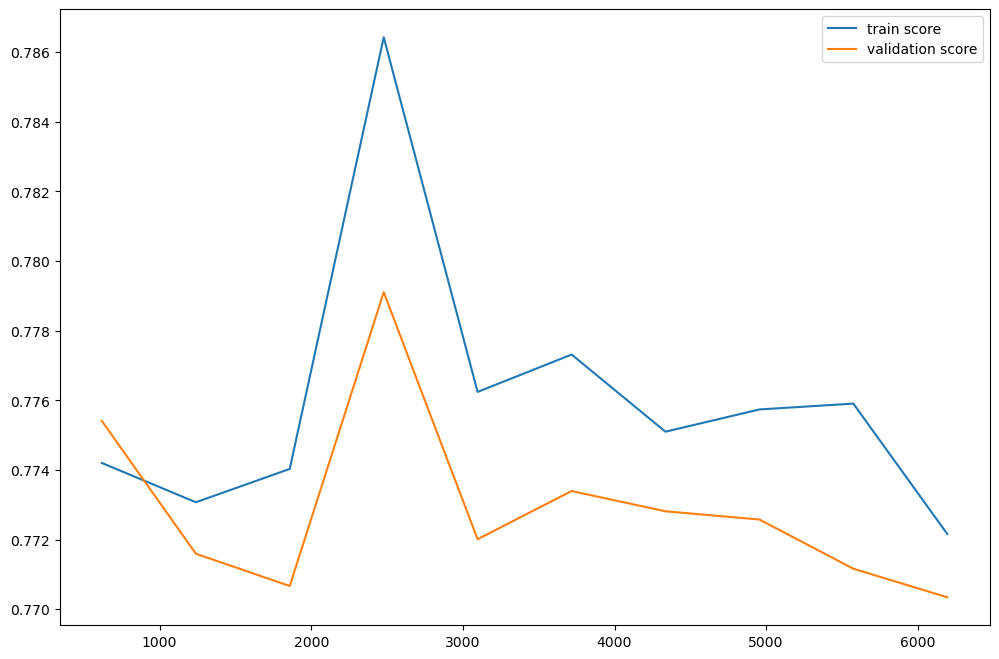

In [933]:
evaluation(SVM)

#### Choix du meilleur modele et Optimisation de celeui-ci

In [934]:
hyper_params = {'svc__gamma':[1e-3, 1e-4],  # 'kernel': ['linear', 'rbf'],'gamma': ['scale', 'auto'] autre parametre 
                'svc__C':[1,10,100,1000],
                'pipeline__selectkbest__k':range(4,20)}

In [935]:
grid = RandomizedSearchCV(SVM, 
                          hyper_params,
                          scoring="recall",
                          n_iter=40,
                          cv=4)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'svc__gamma': 0.0001, 'svc__C': 1, 'pipeline__selectkbest__k': 8}


In [936]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.52      0.65      1006
           1       0.67      0.92      0.77      1060

    accuracy                           0.72      2066
   macro avg       0.76      0.72      0.71      2066
weighted avg       0.76      0.72      0.71      2066



[[522 484]
 [ 87 973]]
              precision    recall  f1-score   support

           0       0.86      0.52      0.65      1006
           1       0.67      0.92      0.77      1060

    accuracy                           0.72      2066
   macro avg       0.76      0.72      0.71      2066
weighted avg       0.76      0.72      0.71      2066



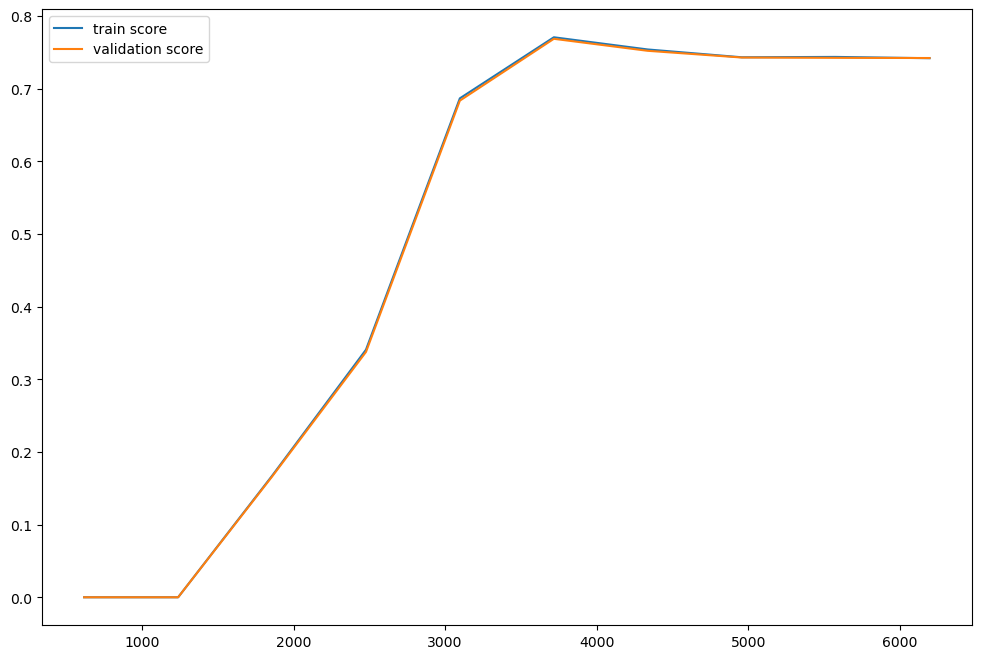

In [937]:
evaluation(grid.best_estimator_)

Precision Recall Curve 

In [938]:
precision,recall,threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

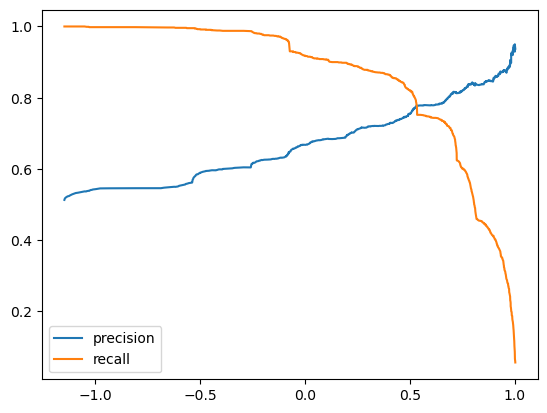

In [939]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

##### Evaluation Finale 

In [940]:
def model_final(model, X, threshold=0):
    return model.decision_function(X)>threshold

In [953]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=0.5)

In [954]:
print(f'{f1_score(y_test, y_pred)=}')
print(f"{recall_score(y_test, y_pred)=}")
print(f"{precision_score(y_test, y_pred)=}")

f1_score(y_test, y_pred)=0.786618444846293
recall_score(y_test, y_pred)=0.8207547169811321
precision_score(y_test, y_pred)=0.7552083333333334


In [955]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1006
           1       0.76      0.82      0.79      1060

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

